# Build 1D model

In [1]:
import sys
sys.path.append("../")
import numpy as np
import warmth
from warmth.forward_modelling import Forward_model

In [2]:
model = warmth.Model()

In [3]:
import pandas as pd
node_template=model.builder.single_node_sediments_inputs_template
h1 = [152.0,0.0,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0,0]
h2=[810.0,20.0,1.538462,2.079433e-09,0.599730,0.490,2708.0,2437.2, 0,0]
h3=[1608.0,66,1.500000,2.301755e-09,0.2,0.500,2720.0,2448.0, 0,0]
h4=[1973.0,100,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 100, 5]
h5=[2262.0,145,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0,0]
h6=[2362.0,152,1.904762,4.719506e-10,0.447705,0.415,2618.0,2356.2, 0,0]
h7=[2362.0,160,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0,0]
horizons=[h1,h2,h3,h4,h5,h6,h7]
for i in horizons:
    new =pd.DataFrame.from_dict({'top': [i[0]], 'topage': [int(i[1])], 'k_cond': [i[2]], 'rhp':[i[3]], 'phi':[i[4]], 'decay':[i[5]], 'solidus':[i[6]],'liquidus':[i[7]], 'erosion': [i[8]], "erosion_duration": [i[9]]})
    node_template = pd.concat([node_template, new], ignore_index=True)
   

In [4]:
# import pandas as pd
# node_template=model.builder.single_node_sediments_inputs_template
# h1 = [152.0,0.0,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0,0]
# h2=[810.0,20.0,1.538462,2.079433e-09,0.599730,0.490,2708.0,2437.2, 0,0]
# h3=[1608.0,66,1.500000,2.301755e-09,0.2,0.500,2720.0,2448.0, 0,0]
# h4=[1973.0,100,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0, 0]
# h5=[2262.0,145,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0,0]
# h6=[2362.0,152,1.904762,4.719506e-10,0.447705,0.415,2618.0,2356.2, 0,0]
# h7=[2427.0,160,1.500000,2.301755e-09,0.620000,0.500,2720.0,2448.0, 0,0]
# horizons=[h1,h2,h3,h4,h5,h6,h7]
# for i in horizons:
#     new =pd.DataFrame.from_dict({'top': [i[0]], 'topage': [int(i[1])], 'k_cond': [i[2]], 'rhp':[i[3]], 'phi':[i[4]], 'decay':[i[5]], 'solidus':[i[6]],'liquidus':[i[7]], 'erosion': [i[8]], "erosion_duration": [i[9]]})
#     node_template = pd.concat([node_template, new], ignore_index=True)
   

Create a single node and add it to the model

In [5]:
node =warmth.single_node()
node.sediments_inputs = node_template
node.sediments

/workspaces/warmth/warmth/build.py:224: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  check_ascending = df.apply(lambda x: x.is_monotonic_increasing)
/workspaces/warmth/warmth/build.py:224: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  check_ascending = df.apply(lambda x: x.is_monotonic_increasing)
/workspaces/warmth/warmth/build.py:224: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  check_ascending = df.apply(lambda x: x.is_monotonic_increasing)


top topage    k_cond           rhp       phi  decay  solidus  liquidus  \
0   152.0      0  1.500000  2.301755e-09  0.620000  0.500   2720.0    2448.0   
1   810.0     20  1.538462  2.079433e-09  0.599730  0.490   2708.0    2437.2   
2  1608.0     66  1.500000  2.301755e-09  0.200000  0.500   2720.0    2448.0   
3  1973.0    100  1.500000  2.301755e-09  0.620000  0.500   2720.0    2448.0   
4  2262.0    145  1.500000  2.301755e-09  0.620000  0.500   2720.0    2448.0   
5  2362.0    152  1.904762  4.719506e-10  0.447705  0.415   2618.0    2356.2   

   erosion  erosion_duration    base baseage  thickness  grain_thickness  \
0        0                 0   810.0      20      658.0         0.310357   
1        0                 0  1608.0      66      798.0         0.511062   
2        0                 0  1973.0     100      365.0         0.332780   
3      100                 5  2262.0     145      289.0         0.221878   
4        0                 0  2362.0     152      100.0         0.078943   
5        0                 0  2362.0     160        0.0         0.000000   

   phi_mean  eroded_grain_thickness  
0  0.528332                0.000000  
1  0.359571                0.000000  
2  0.088275                0.000000  
3  0.232256                0.076774  
4  0.210571                0.000000  
5  0.000000                0.000000

In [6]:
model.parameters.time_start=int(node.sediments["baseage"].iloc[-1])
model.parameters.time_end = 0

In [7]:
node.crustRHP = 2e-6 
node.qbase = 30e-3
node.rift = np.array([[160,145]])
#node.paleoWD=np.array([200]) # Only for mulit rift

In [8]:
model.builder.nodes = [[node]]

In [9]:
from warmth.data import haq87
model.builder.set_eustatic_sea_level(haq87)

In [10]:
model.simulator.run(parallel=False)


In [11]:
model.builder.nodes[0][0].sed[3,:,105]

array([  0.        , 392.18966294])

In [12]:
model.builder.nodes[0][0].sed[4,:,145]

array([  0.        , 100.00000003])

In [13]:
model.builder.nodes[0][0].sed[3,:,90:120]

array([[106.69464777,  96.0018977 ,  85.3144162 ,  74.63216746,
         63.95511599,  53.28322661,  42.61646442,  31.95479482,
         21.29818352,  10.64659649,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [395.69464785, 385.00189778, 374.31441628, 363.63216754,
        352.95511607, 342.28322669, 331.6164645 , 320.9547949 ,
        310.2981836 , 299.64659657, 289.00000008, 309.49292264,
        330.05683797, 350.69323438, 371.40364761, 392.18966294,
        382.07291794, 371.97424472, 361.89345648, 351.83036934,
        341.78480222, 331.75657683, 321.74551762, 311.75145167,
        301.77420866, 291.81362086, 281.869523  , 271.94175228,
        262.03014828, 252.13455294]])

In [14]:
t100=model.builder.nodes[0][0].result.temperature(100,3)
t100

{'depth': array([1101.24337715, 1390.24337723]),
 'layerId': array([3], dtype=int32),
 'values': array([ 5.        , 29.85663711])}

In [15]:
t106=model.builder.nodes[0][0].result.temperature(106,3)
t106

{'depth': array([1132.49870093, 1514.57161886]),
 'layerId': array([3], dtype=int32),
 'values': array([ 5.        , 35.76844093])}

In [16]:
# Check if approx. 100m is eroded
t106["depth"][-1]-t106["depth"][0], t100["depth"][-1]-t100["depth"][0],t106["depth"][-1]-t106["depth"][0]> t100["depth"][-1]-t100["depth"][0]

(382.0729179378675, 289.00000008015945, True)

In [17]:
model.builder.nodes[0][0].result.temperature(100,3)

{'depth': array([1101.24337715, 1390.24337723]),
 'layerId': array([3], dtype=int32),
 'values': array([ 5.        , 29.85663711])}

In [18]:
model.builder.nodes[0][0].result.temperature_history(3)

array([[106.6570553 , 105.11554665, 103.591928  , 102.08327862,
        100.58708382,  99.1011563 ,  97.62357829,  96.15265939,
         94.68690698,  93.22500735,  91.76581749,  90.30836846,
         88.85188384,  87.39581967,  85.93993931,  84.48445037,
         83.03026552,  81.57954601,  80.13702106,  78.71409179,
         77.3623651 ,  76.43814443,  75.51263858,  74.58565072,
         73.65698814,  72.72646146,  71.79388402,  70.85907131,
         69.92184055,  68.9820103 ,  68.03940012,  67.09383013,
         66.14512073,  65.19309225,  64.23756455,  63.27835673,
         62.31528676,  61.34817109,  60.37682435,  59.40105892,
         58.42068463,  57.43550839,  56.44533391,  55.44996138,
         54.4491873 ,  53.44280441,  52.43060164,  51.41236437,
         50.38787481,  49.35691261,  48.31925582,  47.27468209,
         46.2229703 ,  45.16390251,  44.09726668,  43.02286015,
         41.9404948 ,  40.85000472,  39.7512583 ,  38.644178  ,
         37.52877339,  36.40519966,  35.

In [19]:
# Check no decompaction with eroded
for i in np.arange(50,105,1, dtype=int):
    val=model.builder.nodes[0][0].sed[3,:,i]
    print(i,val[-1]-val[0],val[0])

50 289.00000008015934 623.8586733813934
51 289.00000008015934 607.2213071302128
52 289.00000008015934 590.6507413446849
53 289.00000008015934 574.1456471968345
54 289.00000008015945 557.7047365658027
55 289.00000008015945 541.3267603247834
56 289.00000008015934 525.0105067194031
57 289.0000000801595 508.7547998316465
58 289.0000000801594 492.55849812388595
59 289.0000000801594 476.420493057967
60 289.00000008015945 460.3397077846812
61 289.00000008015934 444.3150958992925
62 289.00000008015945 428.34564025909697
63 289.0000000801594 412.4303518592812
64 289.00000008015945 396.56826876360594
65 289.00000008015945 380.75845508668704
66 289.0000000801594 365.0000000248629
67 289.0000000801594 354.16920791639967
68 289.0000000801595 343.3446447066356
69 289.00000008015934 332.52626612615256
70 289.0000000801594 321.7140283081515
71 289.0000000801595 310.9078877836543
72 289.0000000801594 300.1078014767773
73 289.0000000801594 289.31372670007676
74 289.0000000801595 278.52562114996414
75 28

In [20]:
model.builder.nodes[0][0].result.temperature(130,3)

{'depth': array([1388.00031556, 1532.29690032]),
 'layerId': array([3], dtype=int32),
 'values': array([ 5.        , 18.01147252])}

In [21]:
model.builder.nodes[0][0].result.temperature(140,3)

{'depth': array([1419.71836667, 1467.48613325]),
 'layerId': array([3], dtype=int32),
 'values': array([5.        , 9.60495758])}

In [22]:
model.builder.nodes[0][0].result.temperature(100,3)

{'depth': array([1101.24337715, 1390.24337723]),
 'layerId': array([3], dtype=int32),
 'values': array([ 5.        , 29.85663711])}

In [23]:
model.builder.nodes[0][0].result.vitrinite_reflectance_history(3)

array([[0.57257098, 0.56449831, 0.5557808 , 0.54636738, 0.53660084,
        0.52699765, 0.51803655, 0.51003539, 0.5030884 , 0.49700575,
        0.49129801, 0.48532988, 0.47862181, 0.47108245, 0.46300757,
        0.45489378, 0.44722622, 0.44034833, 0.43442679, 0.42947088,
        0.42535714, 0.42176267, 0.41838187, 0.41502835, 0.41150027,
        0.40762814, 0.40331713, 0.39856731, 0.39346663, 0.38816341,
        0.38283101, 0.37763611, 0.37271715, 0.36817366, 0.36406297,
        0.36039718, 0.35713368, 0.35416115, 0.35129674, 0.3483129 ,
        0.34499494, 0.34120534, 0.33692373, 0.33224567, 0.32734682,
        0.32243298, 0.31769597, 0.31328594, 0.30930071, 0.30578612,
        0.30273703, 0.30008969, 0.29771081, 0.29540695, 0.2929723 ,
        0.29025855, 0.28722598, 0.28394732, 0.28056944, 0.27725996,
        0.27416383, 0.27138075, 0.2689615 , 0.26691575, 0.26522406,
        0.26384954, 0.26274523, 0.26179052, 0.26089588, 0.26005943,
        0.25927872, 0.25855073, 0.2578719 , 0.25

/workspaces/warmth/warmth/postprocessing.py:194: RuntimeWarning: invalid value encountered in divide
  v=-1*initial_poro/initial_decay*phi1


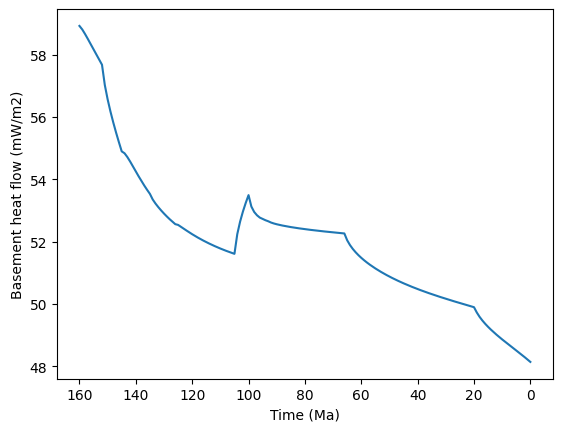

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(node.result.ages,[node.result.basement_heatflow(age)*1000 for age in node.result.ages])
plt.gca().invert_xaxis()
plt.xlabel("Time (Ma)")
plt.ylabel("Basement heat flow (mW/m2)")
plt.show()

In [25]:
import ipywidgets as widgets
import matplotlib.pyplot as plt

def plot_cell_bound(age):
    t = node.result.temperature(age)
    plt.plot(t["values"],t["depth"])
    plt.gca().invert_yaxis()
    plt.xlabel("Temperature (C)")
    plt.ylabel("Depth (m)")
    plt.ylim(top=0,bottom=node.result.temperature(age,-2)["depth"][0]+1000)
    plt.show()

widgets.interact(plot_cell_bound, age = widgets.IntSlider(value=0,max=node.result.ages[-1],min=node.result.ages[0],step=1))

interactive(children=(IntSlider(value=0, description='age', max=160), Output()), _dom_classes=('widget-interac…

<function __main__.plot_cell_bound(age)>

In [26]:
def plot_cell_properties(age):
    t = node.result.effective_conductivity(age)
    plt.plot(t["values"],t["depth"])
    plt.gca().invert_yaxis()
    plt.xlabel("Conductivity")
    plt.ylabel("Depth (m)")
    plt.ylim(top=0,bottom=node.result.temperature(age,-1)["depth"][0])
    plt.show()

widgets.interact(plot_cell_properties, age = widgets.IntSlider(value=0,max=node.result.ages[-1],min=node.result.ages[0],step=1))

interactive(children=(IntSlider(value=0, description='age', max=160), Output()), _dom_classes=('widget-interac…

<function __main__.plot_cell_properties(age)>